In [1]:
#Importing relevant libraries
import cv2
import numpy as np
#Replacement imshow function for Google Colab
#Remove this and use cv2.imshow for Jupyter Notebook
from google.colab.patches import cv2_imshow 

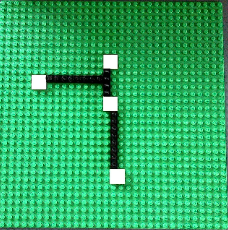

In [11]:
#Read image
img=cv2.imread("lego.PNG") #Insert image path here
cv2_imshow(img)

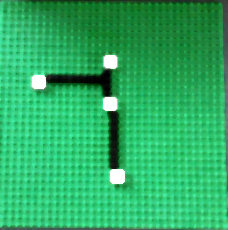

In [12]:
#Apply median blur (creates a blurry version of original image for mask creation)
median=cv2.medianBlur(img,5)
cv2_imshow(median)

This cell can be modified for the colour being searched for (black is the absence of colour; i.e. (0,0,0) RGB (upper threshold because true RGB black is extremely rare).

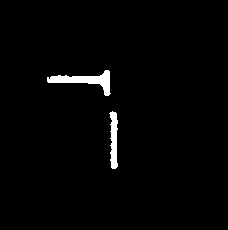

In [34]:
#Applies a filter (in example for black only) 
#Requires experimenting
lower = (0,0,0) 
upper = (40,40,40) 
thresh = cv2.inRange(median, lower, upper)
cv2_imshow(thresh)

The amount of messing with the morphology field depends on how much artifacting is in the threshold mask. For this image, it just requires smoothing out.

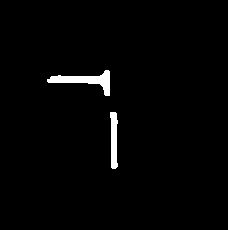

In [36]:
#Morphology field to smooth the threshold mask (avoids artifacting)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (29,29))
morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)
cv2_imshow(morph)

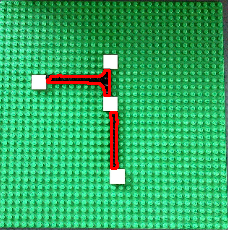

In [38]:
#Find contours of the morphology image
contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1] #Takes contour list
#Apply to mask
result = img.copy() #Copies original image to draw on
#Initialise loop to draw contours
for i in contours:
  area = cv2.contourArea(i) #Takes area of given contour
  if area > 100:  #Checks threshold for area of contour is suitable; omits small contours
    cv2.drawContours(result, [i], -1, (0, 0, 255), 2) #Draws contour on results
cv2_imshow(result) 